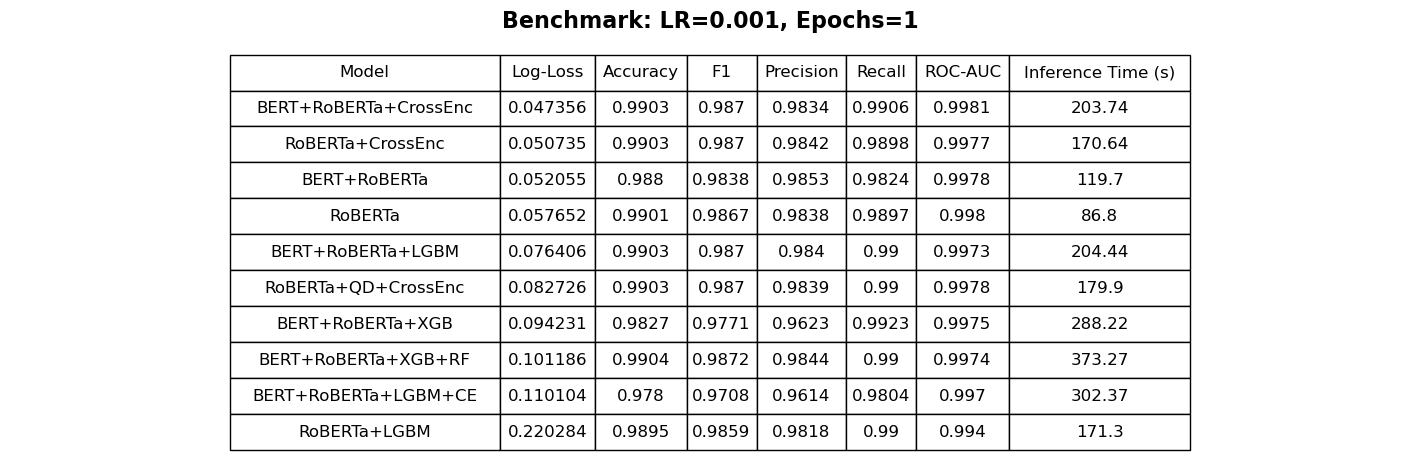

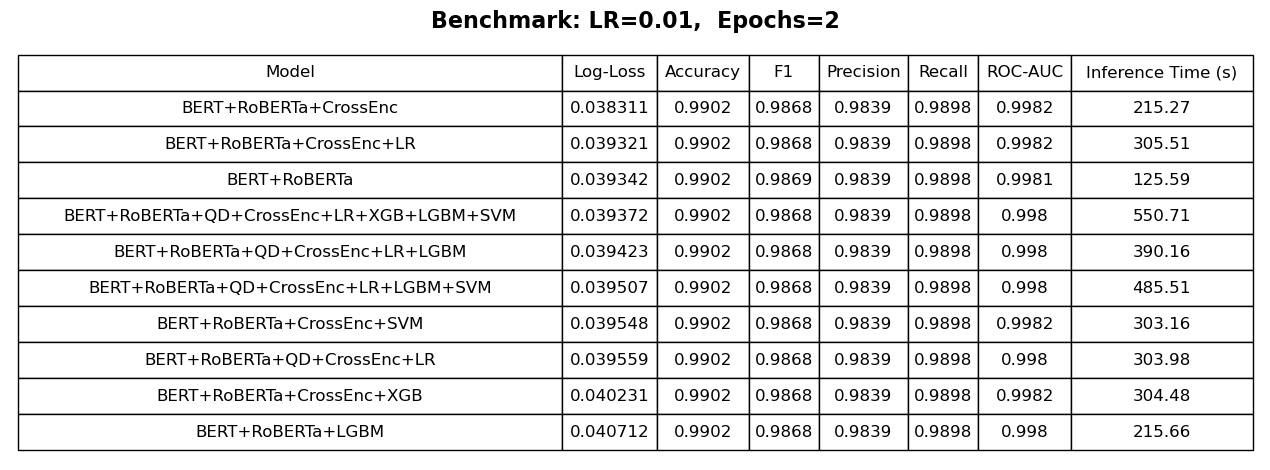

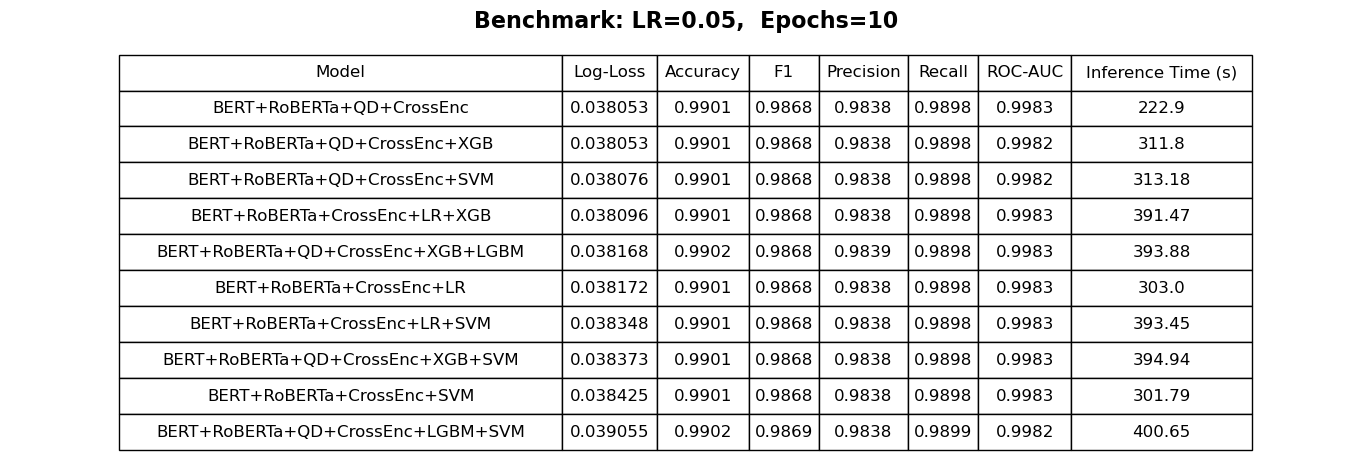

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns
columns = ["Model", "Log-Loss", "Accuracy", "F1", "Precision", "Recall", "ROC-AUC", "Inference Time (s)"]

# Data for each configuration
lr001_ep1 = pd.DataFrame([
    ["BERT+RoBERTa+CrossEnc", 0.047356, 0.9903, 0.9870, 0.9834, 0.9906, 0.9981, 203.74],
    ["RoBERTa+CrossEnc",       0.050735, 0.9903, 0.9870, 0.9842, 0.9898, 0.9977, 170.64],
    ["BERT+RoBERTa",           0.052055, 0.9880, 0.9838, 0.9853, 0.9824, 0.9978, 119.70],
    ["RoBERTa",                0.057652, 0.9901, 0.9867, 0.9838, 0.9897, 0.9980,  86.80],
    ["BERT+RoBERTa+LGBM",      0.076406, 0.9903, 0.9870, 0.9840, 0.9900, 0.9973, 204.44],
    ["RoBERTa+QD+CrossEnc",    0.082726, 0.9903, 0.9870, 0.9839, 0.9900, 0.9978, 179.90],
    ["BERT+RoBERTa+XGB",       0.094231, 0.9827, 0.9771, 0.9623, 0.9923, 0.9975, 288.22],
    ["BERT+RoBERTa+XGB+RF",    0.101186, 0.9904, 0.9872, 0.9844, 0.9900, 0.9974, 373.27],
    ["BERT+RoBERTa+LGBM+CE",   0.110104, 0.9780, 0.9708, 0.9614, 0.9804, 0.9970, 302.37],
    ["RoBERTa+LGBM",           0.220284, 0.9895, 0.9859, 0.9818, 0.9900, 0.9940, 171.30],
], columns=columns)

lr01_ep2 = pd.DataFrame([
    ["BERT+RoBERTa+CrossEnc",                 0.038311, 0.9902, 0.9868, 0.9839, 0.9898, 0.9982, 215.27],
    ["BERT+RoBERTa+CrossEnc+LR",              0.039321, 0.9902, 0.9868, 0.9839, 0.9898, 0.9982, 305.51],
    ["BERT+RoBERTa",                          0.039342, 0.9902, 0.9869, 0.9839, 0.9898, 0.9981, 125.59],
    ["BERT+RoBERTa+QD+CrossEnc+LR+XGB+LGBM+SVM",0.039372,0.9902,0.9868, 0.9839,0.9898, 0.9980, 550.71],
    ["BERT+RoBERTa+QD+CrossEnc+LR+LGBM",      0.039423, 0.9902, 0.9868, 0.9839, 0.9898, 0.9980, 390.16],
    ["BERT+RoBERTa+QD+CrossEnc+LR+LGBM+SVM",  0.039507, 0.9902, 0.9868, 0.9839, 0.9898, 0.9980, 485.51],
    ["BERT+RoBERTa+CrossEnc+SVM",             0.039548, 0.9902, 0.9868, 0.9839, 0.9898, 0.9982, 303.16],
    ["BERT+RoBERTa+QD+CrossEnc+LR",           0.039559, 0.9902, 0.9868, 0.9839, 0.9898, 0.9980, 303.98],
    ["BERT+RoBERTa+CrossEnc+XGB",             0.040231, 0.9902, 0.9868, 0.9839, 0.9898, 0.9982, 304.48],
    ["BERT+RoBERTa+LGBM",                     0.040712, 0.9902, 0.9868, 0.9839, 0.9898, 0.9980, 215.66],
], columns=columns)

lr05_ep10 = pd.DataFrame([
    ["BERT+RoBERTa+QD+CrossEnc",        0.038053, 0.9901, 0.9868, 0.9838, 0.9898, 0.9983, 222.90],
    ["BERT+RoBERTa+QD+CrossEnc+XGB",    0.038053, 0.9901, 0.9868, 0.9838, 0.9898, 0.9982, 311.80],
    ["BERT+RoBERTa+QD+CrossEnc+SVM",    0.038076, 0.9901, 0.9868, 0.9838, 0.9898, 0.9982, 313.18],
    ["BERT+RoBERTa+CrossEnc+LR+XGB",    0.038096, 0.9901, 0.9868, 0.9838, 0.9898, 0.9983, 391.47],
    ["BERT+RoBERTa+QD+CrossEnc+XGB+LGBM",0.038168, 0.9902, 0.9868, 0.9839,0.9898, 0.9983, 393.88],
    ["BERT+RoBERTa+CrossEnc+LR",        0.038172, 0.9901, 0.9868, 0.9838, 0.9898, 0.9983, 303.00],
    ["BERT+RoBERTa+CrossEnc+LR+SVM",    0.038348, 0.9901, 0.9868, 0.9838, 0.9898, 0.9983, 393.45],
    ["BERT+RoBERTa+QD+CrossEnc+XGB+SVM",0.038373, 0.9901, 0.9868, 0.9838,0.9898, 0.9983, 394.94],
    ["BERT+RoBERTa+CrossEnc+SVM",       0.038425, 0.9901, 0.9868, 0.9838, 0.9898, 0.9983, 301.79],
    ["BERT+RoBERTa+QD+CrossEnc+LGBM+SVM",0.039055, 0.9902, 0.9869, 0.9838,0.9899,0.9982,400.65],
], columns=columns)

# Sort each by log-loss then accuracy
tables = [
    (lr001_ep1.sort_values(["Log-Loss","Accuracy"]), "Benchmark: LR=0.001, Epochs=1"),
    (lr01_ep2.sort_values(["Log-Loss","Accuracy"]),  "Benchmark: LR=0.01,  Epochs=2"),
    (lr05_ep10.sort_values(["Log-Loss","Accuracy"]), "Benchmark: LR=0.05,  Epochs=10"),
]

for df, title in tables:
    # create a standalone figure
    plt.figure(figsize=(14, 0.5 + 0.4 * len(df)))
    plt.axis("off")

    # render the table
    tbl = plt.table(
        cellText=df.values,
        colLabels=df.columns,
        loc="center",
        cellLoc="center",
    )

    # dynamically adjust column widths
    tbl.auto_set_column_width(col=list(range(len(df.columns))))

    # set font sizes and scaling
    tbl.set_fontsize(12)
    tbl.scale(1.5, 1.8)

    # title just above the table
    plt.title(title, fontsize=16, fontweight="bold", pad=12)

    # remove all padding around the table
    plt.tight_layout(pad=0)

    plt.show()

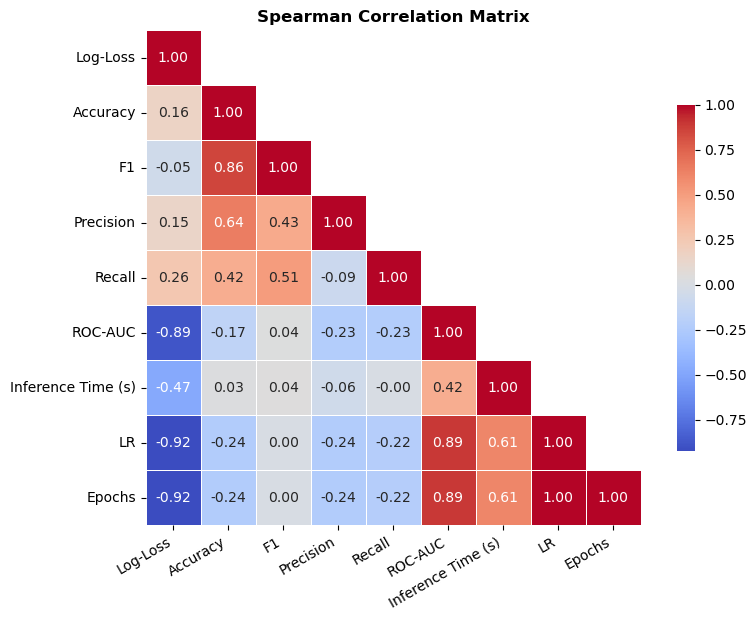

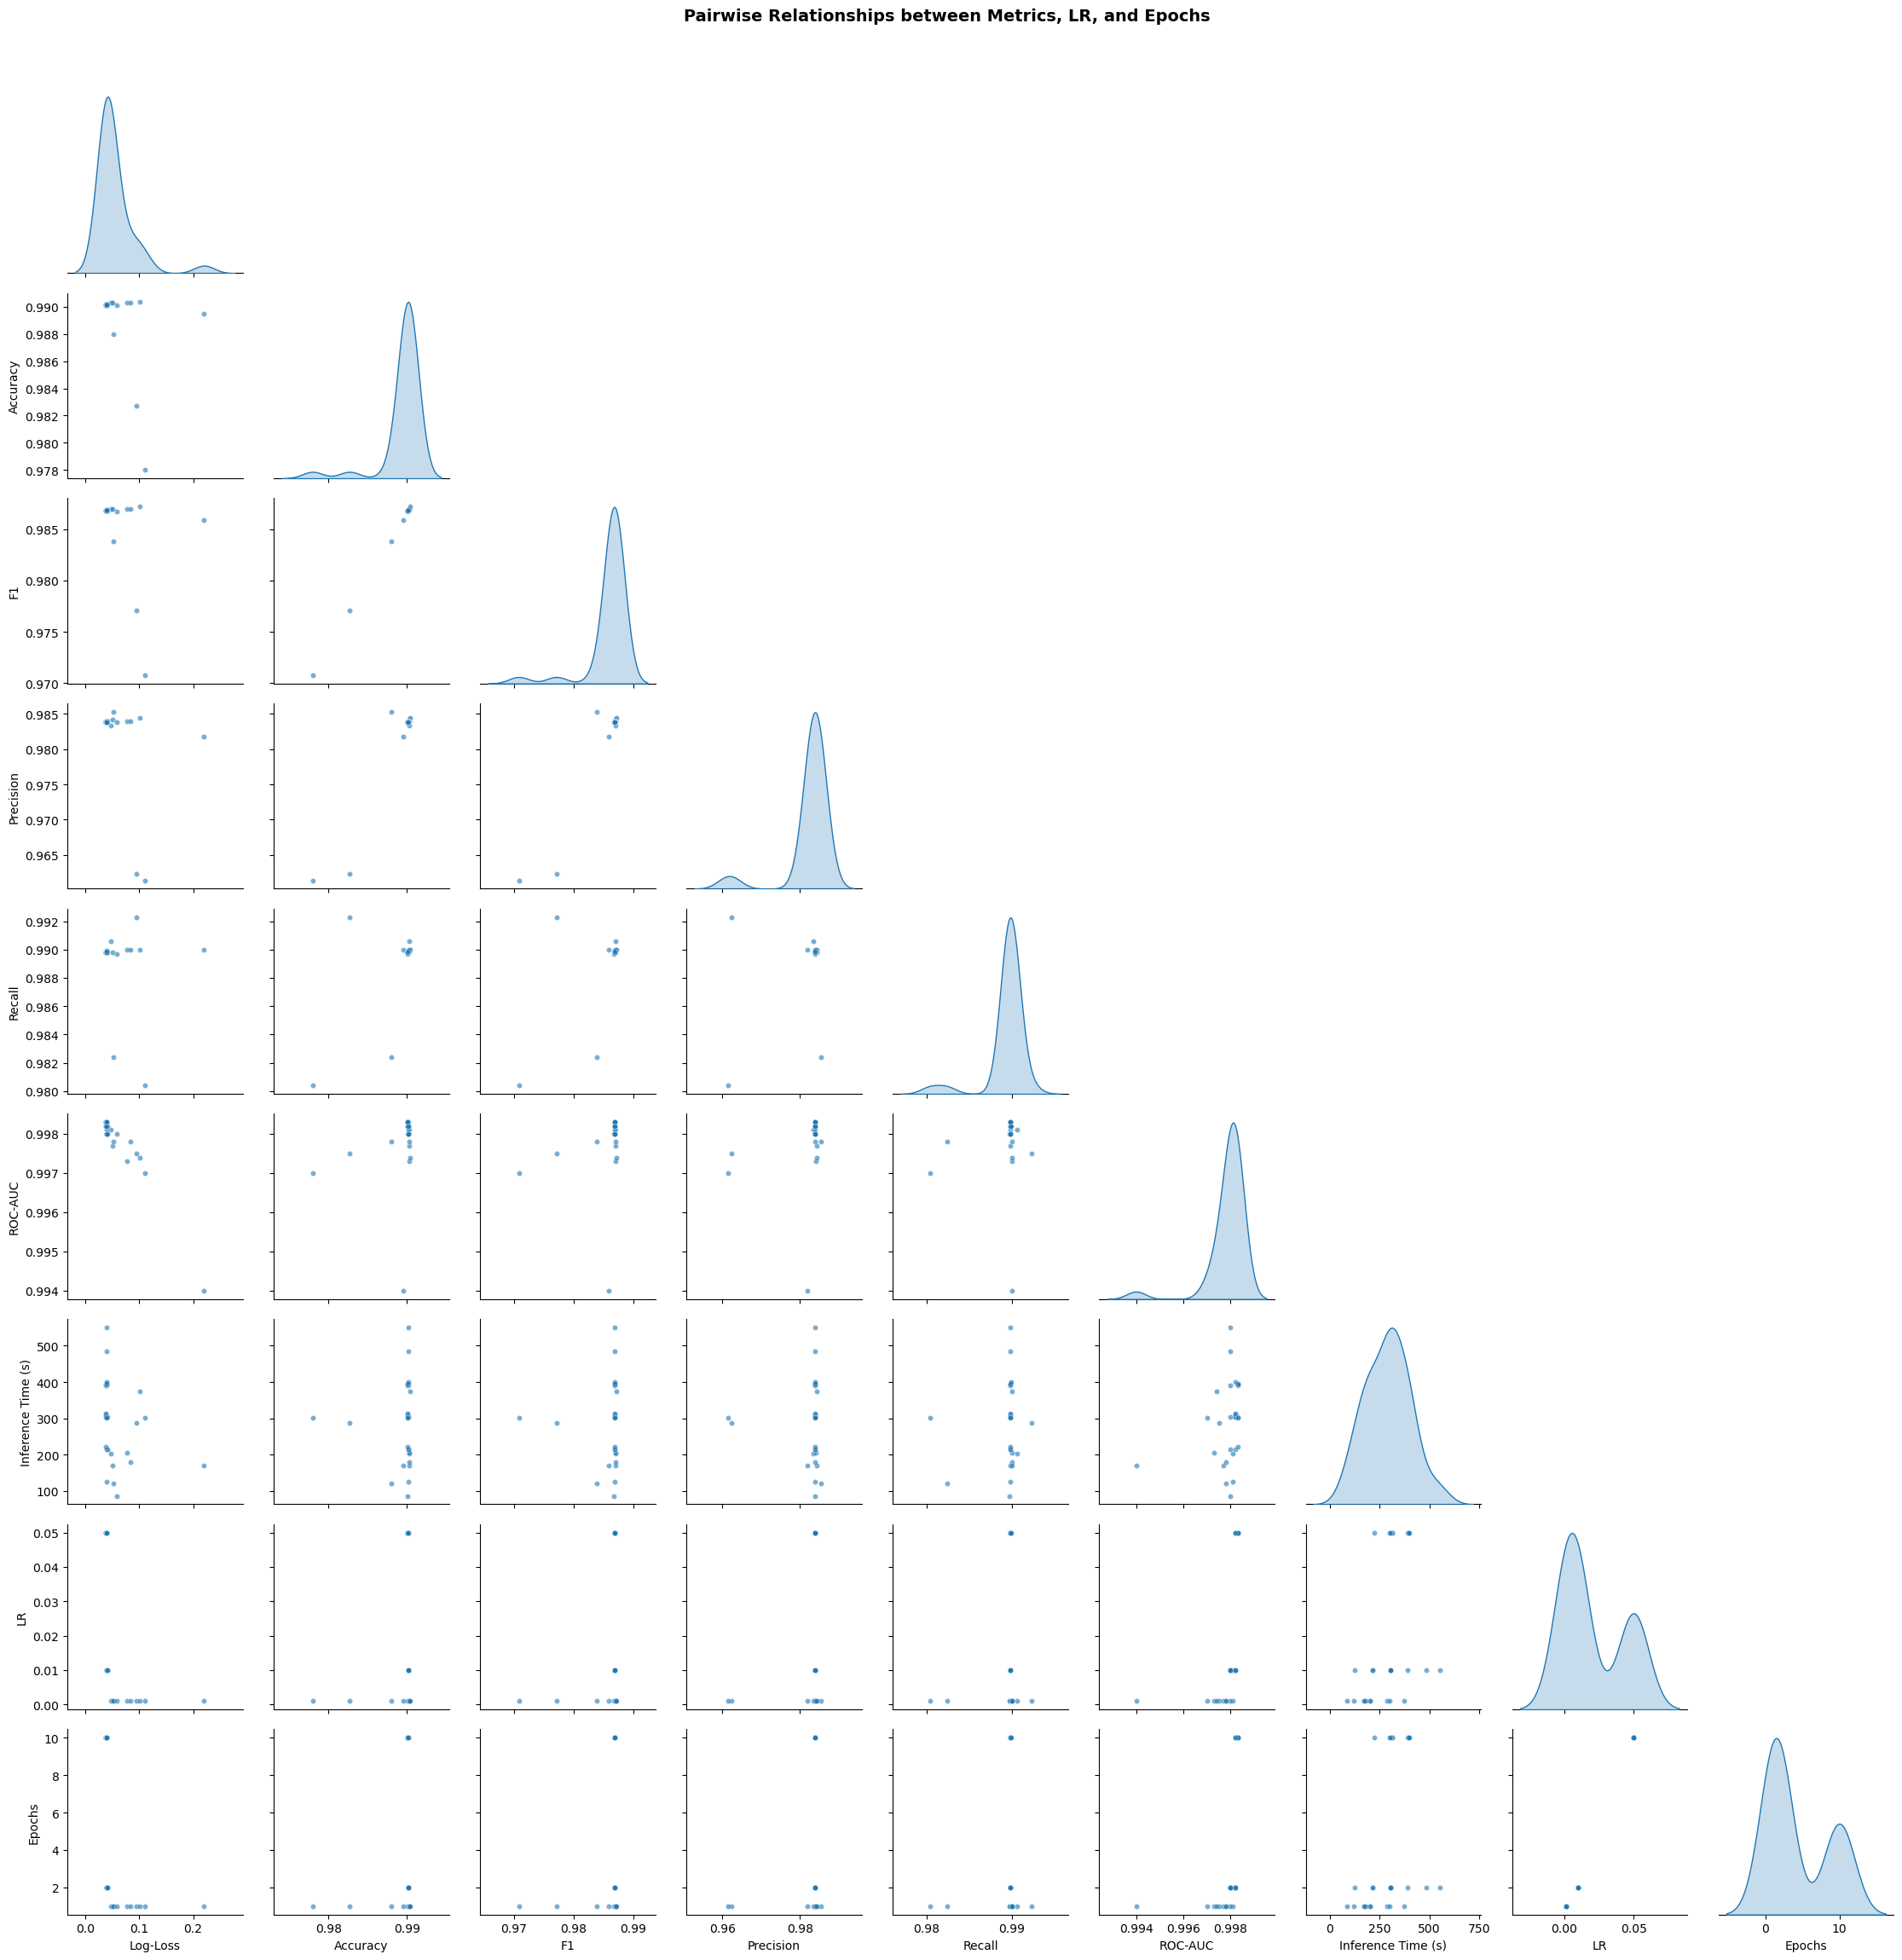

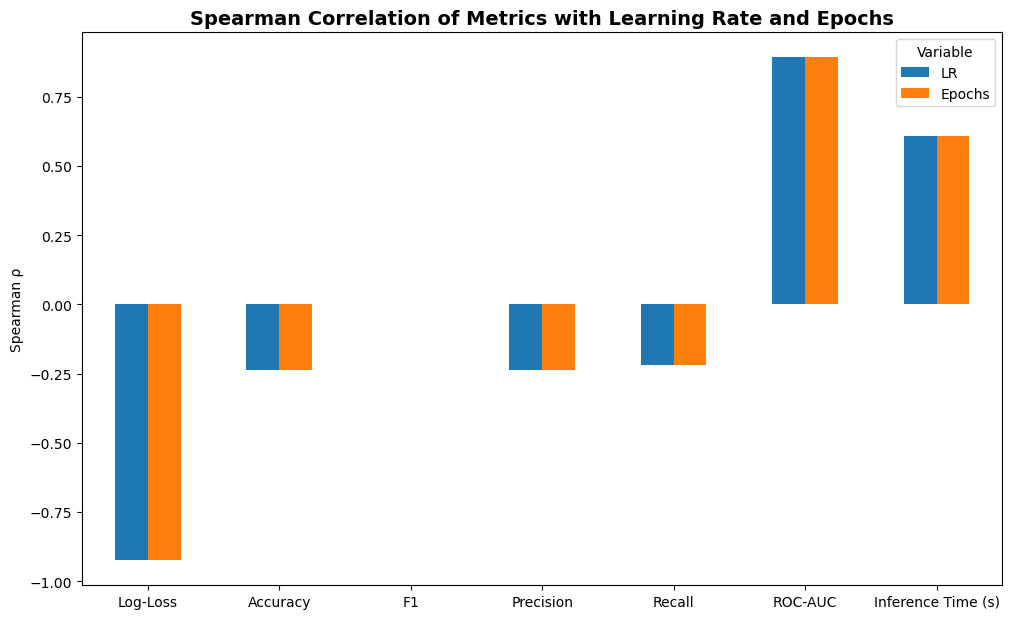

In [33]:
# Annotate each with numeric LR and Epochs
lr001_ep1["LR"], lr001_ep1["Epochs"] = 0.001, 1
lr01_ep2["LR"],  lr01_ep2["Epochs"]   = 0.01,  2
lr05_ep10["LR"], lr05_ep10["Epochs"]  = 0.05, 10

# Annotate each with numeric LR and Epochs
for df, lr, ep in [(lr001_ep1, 0.001, 1), (lr01_ep2, 0.01, 2), (lr05_ep10, 0.05, 10)]:
    df["LR"], df["Epochs"] = lr, ep

# Combine into one DataFrame
df_all = pd.concat([lr001_ep1, lr01_ep2, lr05_ep10], ignore_index=True)

# Select only numeric columns for correlation
numeric_cols = ["Log-Loss", "Accuracy", "F1", "Precision", "Recall", "ROC-AUC", "Inference Time (s)", "LR", "Epochs"]
df_num = df_all[numeric_cols]

# Compute Spearman rank correlation matrix
corr = df_num.corr(method="spearman")

# Heatmap: keep diagonal, mask only above it
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.7},
    linewidths=0.5,
    xticklabels=corr.columns,
    yticklabels=corr.index
)
plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)
plt.title("Spearman Correlation Matrix", fontsize=12, fontweight="bold", pad=6)
plt.subplots_adjust(left=0.12, right=0.98, top=0.92, bottom=0.12)
plt.tight_layout(pad=0)
plt.show()

# 2) Pairwise scatterplot matrix (corner=True shows only lower diag)
sns.pairplot(df_num, corner=True, diag_kind="kde", plot_kws={"s": 20, "alpha": 0.6})
plt.suptitle("Pairwise Relationships between Metrics, LR, and Epochs", y=1.02, fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

# 3) Bar chart of each metric's correlation with LR and Epochs
corr_subset = corr.loc[
    ["Log-Loss", "Accuracy", "F1", "Precision", "Recall", "ROC-AUC", "Inference Time (s)"],
    ["LR", "Epochs"]
]
corr_subset.plot.bar(
    figsize=(10, 6),
    rot=0
)
plt.title("Spearman Correlation of Metrics with Learning Rate and Epochs", fontsize=14, fontweight="bold")
plt.ylabel("Spearman ρ")
plt.legend(title="Variable")
plt.tight_layout(pad=0)
plt.show()